# Bird Tracking
https://lifewatch.inbo.be/blog/posts/bird-tracking-data-published.html <br>
LifeWatch INBO project <br>
Will use migration data for three gulls - Eric, Nico, and Sanne <br>
8 columns - latitude, longitude, altitude, and time stamps 
### GPS trackers 
on the birds

In [108]:
import pandas as pd

In [109]:
birddata = pd.read_csv("bird_tracking.csv")
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [110]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


Latitude and Longitude are coordinates along a surface of a sphere- 2-D plots = strong distrotions for the flight trajectories

#### Visualization

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

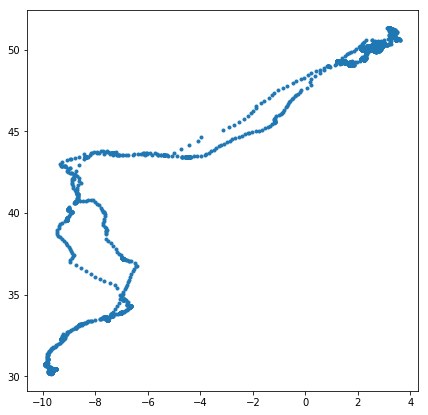

In [112]:
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

In [113]:
bird_names = pd.unique(birddata.bird_name)
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

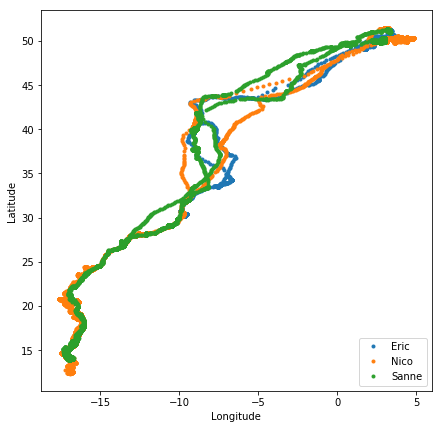

In [114]:
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")

#### Examining Flight Speed

speed data - estimates of two dimensional speeds of the bords. How flast flying on a 2D plane on a local approximation t othe curved surface of the earth.

ValueError: max must be larger than min in range parameter.

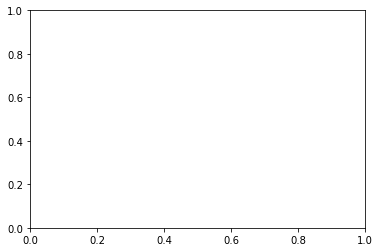

In [115]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [116]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([ 3.,  1.,  0.,  0.,  1.,  2.,  2.,  0.,  0.,  1.]),
 array([ 0.15      ,  0.59422108,  1.03844216,  1.48266324,  1.92688432,
         2.3711054 ,  2.81532648,  3.25954756,  3.70376864,  4.14798972,
         4.5922108 ]),
 <a list of 10 Patch objects>)

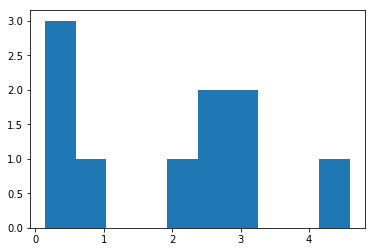

In [117]:
plt.hist(speed[:10])

In [118]:
import numpy as np

In [119]:
np.isnan(speed).any()
#.any() at least one meets criteria NaN in column speed

True

In [120]:
np.sum(np.isnan(speed))

85

In [121]:
ind = np.isnan(speed)
ind.sum()

85

can take a bitwise complement of the ind array - turns each occurence of true to a false and vice versa

In [122]:
~ind

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, Length: 19795, dtype: bool

In [123]:
np.sum(np.isnan(speed)==False)

19710

In [124]:
birddata.speed_2d.shape

(61920L,)

In [125]:
nans = np.sum(np.isnan(speed))
birddata.speed_2d.shape - nans

array([61835], dtype=int64)

(array([  1.77320000e+04,   1.50200000e+03,   3.69000000e+02,
          7.80000000e+01,   1.20000000e+01,   7.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([  0.        ,   6.34880658,  12.69761316,  19.04641974,
         25.39522632,  31.7440329 ,  38.09283948,  44.44164607,
         50.79045265,  57.13925923,  63.48806581]),
 <a list of 10 Patch objects>)

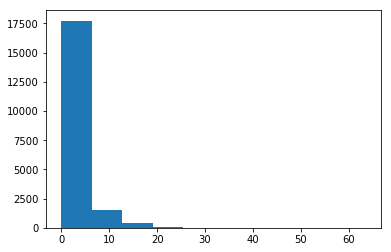

In [126]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind])
# only include entries for which ind is not equal to true

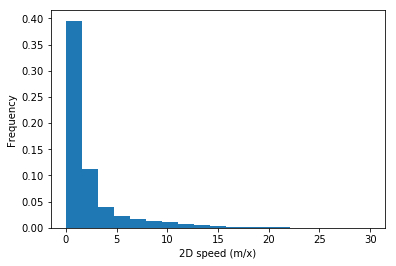

In [127]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), normed=True)
# bin starts at 0 and ends at 30
# y-axis normalized - integral over the histogram = 1
plt.xlabel("2D speed (m/x)")
plt.ylabel("Frequency");

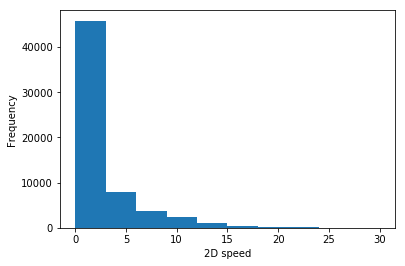

In [128]:
# pandas way
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2D speed");
plt.show()
# pandas handles NaNs under the hood!

#### Datetime
temporal data - data with time - need ot do arithmetical operations with date and timestamps. <br>
<b> datetime </b>

In [129]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

convert to daytime object

In [130]:
import datetime

In [131]:
datetime.datetime.today()

datetime.datetime(2017, 6, 14, 22, 3, 37, 427000)

In [132]:
time_1 = datetime.datetime.today()

In [133]:
time_2 = datetime.datetime.today()

In [134]:
time_2 - time_1 
# date time time delta object

datetime.timedelta(0, 0, 779000)

To computer how much time has passed between any two observations in the dataset, first have to convert the timestamps to datetime objects. <br>
UTC - coordinated universal time +## offsets

In [135]:
date_str = birddata.date_time[0]
print (type(date_str))
print (date_str)
print (date_str[:-3])

<type 'str'>
2013-08-15 00:18:08+00
2013-08-15 00:18:08


In [136]:
date_str[:3]

'201'

In [137]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [138]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                     (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
print (timestamps[0:3])
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)
birddata.head()

[datetime.datetime(2013, 8, 15, 0, 18, 8), datetime.datetime(2013, 8, 15, 0, 48, 7), datetime.datetime(2013, 8, 15, 1, 17, 58)]


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [139]:
birddata.timestamp[4] - birddata.timestamp[3]
# row 4 - row 3

Timedelta('0 days 00:29:51')

In [145]:
# amount of time elapsed from the beginning of data collection
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]
# going over time sequence one object at at at time
# for each object time is different where times [0] from the beginning
print (elapsed_time[0])
print (elapsed_time[1000])
print "days passed: ",(elapsed_time[1000] / datetime.timedelta(days=1))
print "hours passed: ",(elapsed_time[1000] / datetime.timedelta(hours=1))

0 days 00:00:00
12 days 02:02:00
days passed:  12.0847222222
hours passed:  290.033333333


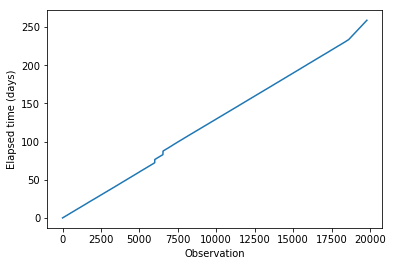

In [146]:
plt.plot(np.array(elapsed_time)/ datetime.timedelta(days = 1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");
plt.show()

plot shows some jumps in the data indicating some observations are further apart from one another than other observations

#### Calculating Daily Mean Speed
- y-axis - mean daily speed
- x-axis time in days

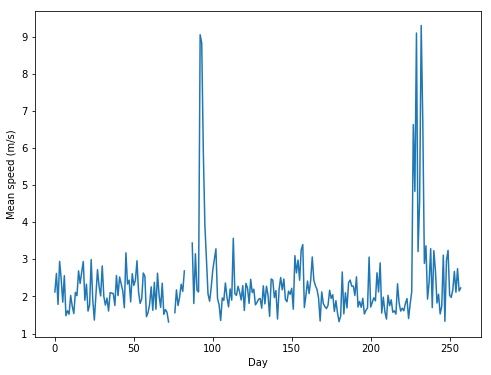

In [150]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1 
inds= []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1 
        inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.show()

peaks = migration

In [151]:
birddata.timestamp.min()

Timestamp('2013-08-15 00:01:08')

#### Cartopy
cartographic tools for Python! <br>
http://scitools.org.uk/cartopy/docs/latest/installing.html#installing

In [157]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [158]:
proj = ccrs.Robinson()

C:\Users\Amber\Anaconda2\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


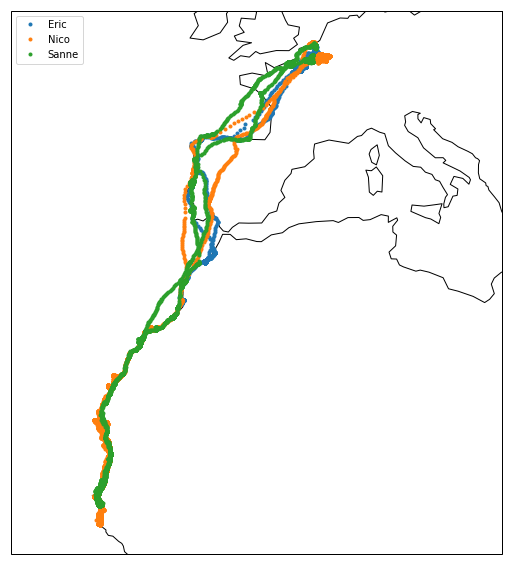

In [160]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cf)
for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc="upper left")
plt.show()